In [1]:
import keras
from keras import models
from keras.layers import Dense, Dropout, Flatten, Activation, Lambda, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np
from data_utils import *
import os


Using TensorFlow backend.


In [2]:
(trainX, trainY), (testX, testY) = cifar_VGG_data_load(keras.datasets.cifar10)

Data type changed to float32, label type changed to categorical
rescale = 1/255.


In [3]:
from keras.preprocessing.image import ImageDataGenerator


data_generator = ImageDataGenerator(rotation_range=90, shear_range = 0.2, zoom_range = 0.2,horizontal_flip = True)

In [4]:
data_generator.fit(trainX)

In [5]:
X_batch, y_batch = data_generator.flow(trainX, trainY, batch_size=9).next()

In [6]:
y_batch.shape

(9, 10)

In [7]:
X_batch.shape

(9, 32, 32, 3)

In [8]:
y_batch

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [9]:
y_batch.shape

(9, 10)

In [12]:
batch_size = 12
X_batch, y_batch = data_generator.flow(trainX, trainY, batch_size=batch_size).next()


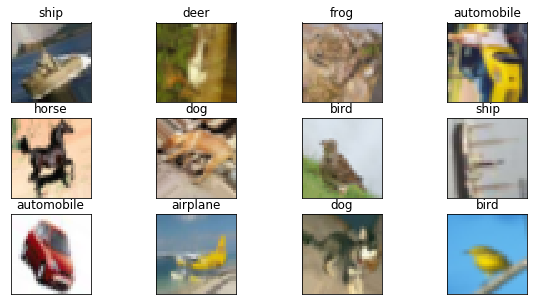

In [14]:
show_images(X_batch, y_batch, batch_size, categorical_data = True)

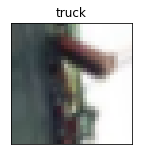

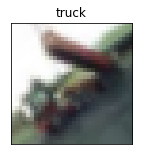

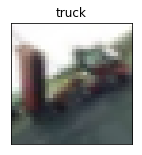

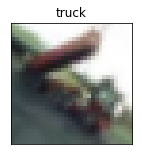

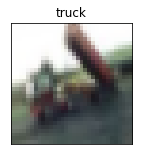

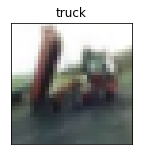

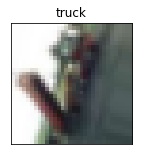

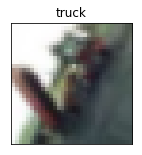

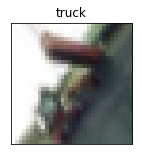

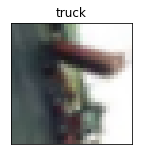

In [25]:
batch_size = 1
fig_num = 2
for i in range(10):
    # X_batch shape should be 4dim(num, W, H, C)
    # y_batch shape sholed be 2dim(num, label)
    X_batch, y_batch = data_generator.flow(trainX[fig_num].reshape((1,) + trainX[fig_num].shape), trainY[fig_num].reshape((1,) + trainY[fig_num].shape), batch_size=batch_size).next()
    show_images(X_batch, y_batch, batch_size, categorical_data = True)